# Set up and load files

In [1]:
#Ensure we are using the right kernel
print (sc.version)

2.4.0-cdh6.3.0


In [2]:
#load libraries
import os
import shutil
import sh
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [3]:
#check files
! ls -l /project2/msca/kadochnikov/data/air_travel/2007.csv

-rwxr-xr-x 1 kadochnikov kadochnikov 702878193 Nov  4  2016 /project2/msca/kadochnikov/data/air_travel/2007.csv


In [4]:
! ls -l /project2/msca/kadochnikov/data/air_travel/2008.csv

-rwxr-xr-x 1 kadochnikov kadochnikov 689413344 Nov  4  2016 /project2/msca/kadochnikov/data/air_travel/2008.csv


In [5]:
#set path
path = "file:///project2/msca/kadochnikov/data/air_travel/"
file2007 = "2007.csv"
csv2007 = path+file2007
csv2007

'file:///project2/msca/kadochnikov/data/air_travel/2007.csv'

In [6]:
file2008 = "2008.csv"
csv2008 = path+file2008
csv2008

'file:///project2/msca/kadochnikov/data/air_travel/2008.csv'

In [7]:
#read files, cache files
air2007 = spark.read.format('com.databricks.spark.csv').\
options(header='true', inferschema='true', delimiter=',', quote='"').load(csv2007)
air2007.cache()

DataFrame[Year: int, Month: int, DayofMonth: int, DayOfWeek: int, DepTime: string, CRSDepTime: int, ArrTime: string, CRSArrTime: int, UniqueCarrier: string, FlightNum: int, TailNum: string, ActualElapsedTime: string, CRSElapsedTime: string, AirTime: string, ArrDelay: string, DepDelay: string, Origin: string, Dest: string, Distance: int, TaxiIn: int, TaxiOut: int, Cancelled: int, CancellationCode: string, Diverted: int, CarrierDelay: int, WeatherDelay: int, NASDelay: int, SecurityDelay: int, LateAircraftDelay: int]

In [8]:
air2008 = spark.read.format('com.databricks.spark.csv').\
options(header='true', inferschema='true', delimiter=',', quote='"').load(csv2008)
air2008.cache()


DataFrame[Year: int, Month: int, DayofMonth: int, DayOfWeek: int, DepTime: string, CRSDepTime: int, ArrTime: string, CRSArrTime: int, UniqueCarrier: string, FlightNum: int, TailNum: string, ActualElapsedTime: string, CRSElapsedTime: string, AirTime: string, ArrDelay: string, DepDelay: string, Origin: string, Dest: string, Distance: int, TaxiIn: string, TaxiOut: string, Cancelled: int, CancellationCode: string, Diverted: int, CarrierDelay: string, WeatherDelay: string, NASDelay: string, SecurityDelay: string, LateAircraftDelay: string]

In [9]:
#show files loaded
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)
air2007.limit(10)

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2007,11,3,6,1514,1518,1626,1629,DL,1806,N902DA,132,131,110,-3,-4,SLC,SEA,689,7,15,0,null,0,0,0,0,0,0
2007,11,3,6,738,740,1034,1043,DL,1807,N968DL,176,183,149,-9,-2,LGA,TPA,1011,5,22,0,null,0,0,0,0,0,0
2007,11,3,6,653,700,933,952,DL,1808,N399DA,340,352,319,-19,-7,FLL,LAX,2342,10,11,0,null,0,0,0,0,0,0
2007,11,3,6,747,751,922,932,DL,1809,N948DL,95,101,74,-10,-4,ATL,RSW,515,5,16,0,null,0,0,0,0,0,0
2007,11,3,6,1752,1800,2045,2049,DL,1810,N615DL,113,109,82,-4,-8,LAX,SLC,590,7,24,0,null,0,0,0,0,0,0
2007,11,3,6,1027,1030,1246,1251,DL,1814,N910DL,79,81,61,-5,-3,MSY,ATL,425,8,10,0,null,0,0,0,0,0,0
2007,11,3,6,923,930,1130,1140,DL,1815,N391DA,127,130,107,-10,-7,MCO,CVG,756,5,15,0,null,0,0,0,0,0,0
2007,11,3,6,819,820,1005,1010,DL,1818,N625DL,106,110,88,-5,-1,ATL,FLL,581,5,13,0,null,0,0,0,0,0,0
2007,11,3,6,NA,815,NA,1542,DL,1820,N388DA,NA,267,NA,NA,NA,SFO,CVG,2036,0,0,1,A,0,0,0,0,0,0
2007,11,3,6,1611,1620,1811,1829,DL,1823,N954DL,60,69,40,-18,-9,BNA,ATL,214,6,14,0,null,0,0,0,0,0,0


In [10]:
air2008.limit(10)

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,null,0,NA,NA,NA,NA,NA
2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,null,0,NA,NA,NA,NA,NA
2008,1,3,4,628,620,804,750,WN,448,N428WN,96,90,76,14,8,IND,BWI,515,3,17,0,null,0,NA,NA,NA,NA,NA
2008,1,3,4,926,930,1054,1100,WN,1746,N612SW,88,90,78,-6,-4,IND,BWI,515,3,7,0,null,0,NA,NA,NA,NA,NA
2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,null,0,2,0,0,0,32
2008,1,3,4,1940,1915,2121,2110,WN,378,N726SW,101,115,87,11,25,IND,JAX,688,4,10,0,null,0,NA,NA,NA,NA,NA
2008,1,3,4,1937,1830,2037,1940,WN,509,N763SW,240,250,230,57,67,IND,LAS,1591,3,7,0,null,0,10,0,0,0,47
2008,1,3,4,1039,1040,1132,1150,WN,535,N428WN,233,250,219,-18,-1,IND,LAS,1591,7,7,0,null,0,NA,NA,NA,NA,NA
2008,1,3,4,617,615,652,650,WN,11,N689SW,95,95,70,2,2,IND,MCI,451,6,19,0,null,0,NA,NA,NA,NA,NA
2008,1,3,4,1620,1620,1639,1655,WN,810,N648SW,79,95,70,-16,0,IND,MCI,451,3,6,0,null,0,NA,NA,NA,NA,NA


# 1. Which locations (Origin and Dest pairs) had the worst delays for both arrivals (ArrDelay) and departures (DepDelay) - for each year

In [15]:
#2007 arrival delay
#It makes more sense to take the mean of the ArrDelay and DepDelay rather than using sum since having a high total delay might due to a large number of flight for that route

arrdelay2007 = air2007.groupby(['Origin', 'Dest']).\
    agg(mean('ArrDelay').alias("total_arrdelay")).\
    orderBy("total_arrdelay", ascending=False).\
    limit(1)
    
arrdelay2007.show()  

+------+----+--------------+
|Origin|Dest|total_arrdelay|
+------+----+--------------+
|   ONT| IAD|         370.0|
+------+----+--------------+



In [16]:
#2008 arrival delay

arrdelay2008 = air2008.groupby(['Origin', 'Dest']).\
    agg(mean('ArrDelay').alias("total_arrdelay")).\
    orderBy("total_arrdelay", ascending=False).\
    limit(1)
    
arrdelay2008.show()  

+------+----+--------------+
|Origin|Dest|total_arrdelay|
+------+----+--------------+
|   CMI| SPI|         575.0|
+------+----+--------------+



In [17]:
#2007 departure delay

depdelay2007 = air2007.groupby(['Origin', 'Dest']).\
    agg(mean('DepDelay').alias("total_depdelay")).\
    orderBy("total_depdelay", ascending=False).\
    limit(1)
    
depdelay2007.show()  

+------+----+--------------+
|Origin|Dest|total_depdelay|
+------+----+--------------+
|   ONT| IAD|         386.0|
+------+----+--------------+



In [18]:
#2008 departure delay

depdelay2008 = air2008.groupby(['Origin', 'Dest']).\
    agg(mean('DepDelay').alias("total_depdelay")).\
    orderBy("total_depdelay", ascending=False).\
    limit(1)
    
depdelay2008.show()  

+------+----+--------------+
|Origin|Dest|total_depdelay|
+------+----+--------------+
|   CMI| SPI|         587.0|
+------+----+--------------+



Based on the tables above, the route going from ONT to IAD has the worst arrival delay for both 2007 and 2008 while the route going from CMI to SPI has the worst departure delay for both 2007 and 2008

# 2. Which locations had fewest delays.

In [25]:
#2007 fewest delays
#logic here: first since we are only counting delays, we filter out early arrival/departures (negative values)
#there are multiple routes that have the fewest numbers of delay (1), thus we show total of 20 in the table

fewestdelay2007 = air2007.filter((air2007.ArrDelay > 0) | (air2007.DepDelay > 0)).\
    groupby(['Origin', 'Dest']).\
    agg(count("*").alias("total_delays")).\
    orderBy("total_delays").\
    limit(20)
    
fewestdelay2007.show()

+------+----+------------+
|Origin|Dest|total_delays|
+------+----+------------+
|   PIA| MSP|           1|
|   ROC| SYR|           1|
|   MDT| LGA|           1|
|   ACY| MYR|           1|
|   BWI| GRR|           1|
|   ATL| OGG|           1|
|   CIC| SMF|           1|
|   MDT| PHL|           1|
|   ELP| MFE|           1|
|   FSD| SBN|           1|
|   PSC| PIH|           1|
|   PIT| DSM|           1|
|   LAN| GRR|           1|
|   SMF| CVG|           1|
|   CVG| SMF|           1|
|   RIC| BWI|           1|
|   GSO| JAX|           1|
|   AZO| MKE|           1|
|   TUL| GJT|           1|
|   PIT| MSN|           1|
+------+----+------------+



In [26]:
#2008 fewest delays

fewestdelay2008 = air2008.filter((air2008.ArrDelay > 0) | (air2008.DepDelay > 0)).\
    groupby(['Origin', 'Dest']).\
    agg(count("*").alias("total_delays")).\
    orderBy("total_delays").\
    limit(20)
    
fewestdelay2008.show()

+------+----+------------+
|Origin|Dest|total_delays|
+------+----+------------+
|   EVV| STL|           1|
|   MSN| RFD|           1|
|   PHL| GRR|           1|
|   MCI| MKE|           1|
|   ONT| SAN|           1|
|   ROA| BWI|           1|
|   MOD| BFL|           1|
|   XNA| FAR|           1|
|   GRB| DSM|           1|
|   BNA| CID|           1|
|   SWF| BDL|           1|
|   RDM| IDA|           1|
|   ORF| SAV|           1|
|   ICT| PIA|           1|
|   MOD| RNO|           1|
|   RDU| GRB|           1|
|   IYK| BFL|           1|
|   AZO| XNA|           1|
|   RAP| TWF|           1|
|   TUL| ASE|           1|
+------+----+------------+



# 3. Do you see any significant seasonality effects for delays?

In [19]:
#2007 arrival and departure delay seasonality
#to perform visualization to see seasonality effects, we need to use spark df to pandas

sea_arrdelay2007 = air2007.select(['Month', 'ArrDelay']).\
    filter('ArrDelay > 0').\
    groupby('Month').\
    agg(mean('ArrDelay').alias("mean_sea_arrdelay")).\
    orderBy("Month").\
    toPandas()
    
sea_depdelay2007 = air2007.select(['Month', 'DepDelay']).\
    filter('DepDelay > 0').\
    groupby('Month').\
    agg(mean('DepDelay').alias("mean_sea_depdelay")).\
    orderBy("Month").\
    toPandas()    


Text(0,0.5,'Arrival Delay')

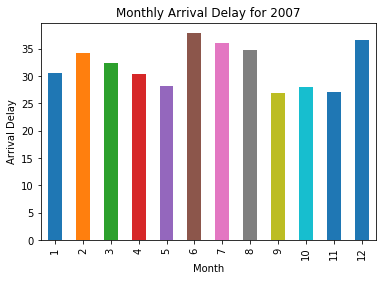

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
sea_arrdelay7_plot = sea_arrdelay2007.plot(kind='bar',x='Month', y='mean_sea_arrdelay', legend=None, title="Monthly Arrival Delay for 2007")
sea_arrdelay7_plot.set_xlabel("Month")
sea_arrdelay7_plot.set_ylabel("Arrival Delay")

Text(0,0.5,'Departure Delay')

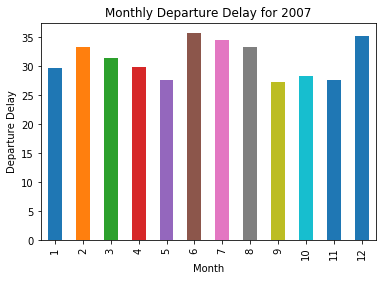

In [21]:
sea_depdelay7_plot = sea_depdelay2007.plot(kind='bar',x='Month', y='mean_sea_depdelay', legend=None, title="Monthly Departure Delay for 2007")
sea_depdelay7_plot.set_xlabel("Month")
sea_depdelay7_plot.set_ylabel("Departure Delay")


In [22]:
#2008 arrival and departure delay seasonality

sea_arrdelay2008 = air2008.select(['Month', 'ArrDelay']).\
    filter('ArrDelay > 0').\
    groupby('Month').\
    agg(mean('ArrDelay').alias("mean_sea_arrdelay")).\
    orderBy("Month").\
    toPandas()
    
sea_depdelay2008 = air2008.select(['Month', 'DepDelay']).\
    filter('DepDelay > 0').\
    groupby('Month').\
    agg(mean('DepDelay').alias("mean_sea_depdelay")).\
    orderBy("Month").\
    toPandas()    


Text(0,0.5,'Arrival Delay')

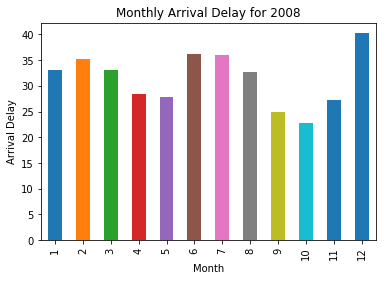

In [23]:
sea_arrdelay8_plot = sea_arrdelay2008.plot(kind='bar',x='Month', y='mean_sea_arrdelay', legend=None, title="Monthly Arrival Delay for 2008")
sea_arrdelay8_plot.set_xlabel("Month")
sea_arrdelay8_plot.set_ylabel("Arrival Delay")

Text(0,0.5,'Departure Delay')

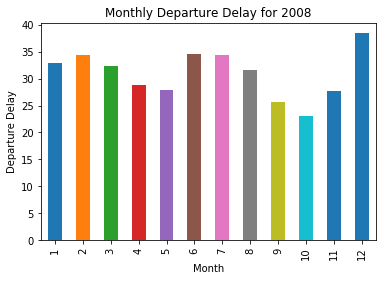

In [24]:
sea_depdelay8_plot = sea_depdelay2008.plot(kind='bar',x='Month', y='mean_sea_depdelay', legend=None, title="Monthly Departure Delay for 2008")
sea_depdelay8_plot.set_xlabel("Month")
sea_depdelay8_plot.set_ylabel("Departure Delay")

Comment: We see similar patterns for arrival and departure delays for 2007 and 2008 where delays happens most frequently in June - August and Decemeber. This is within my expectation as these are the monthly where flights are busy due to summer and winter holidays.

# 4. Do you see any increase or decrease in delays on weekends?

In [27]:
#2007 arrival and departure delay on weekends

dow_arrdelay2007 = air2007.select(['DayOfWeek', 'ArrDelay']).\
    filter('ArrDelay > 0').\
    groupby('DayOfWeek').\
    agg(mean('ArrDelay').alias("mean_dow_arrdelay")).\
    orderBy("DayOfWeek").\
    toPandas()
    
dow_depdelay2007 = air2007.select(['DayOfWeek', 'DepDelay']).\
    filter('DepDelay > 0').\
    groupby('DayOfWeek').\
    agg(mean('DepDelay').alias("mean_dow_depdelay")).\
    orderBy("DayOfWeek").\
    toPandas()    

Text(0,0.5,'Arrival Delay')

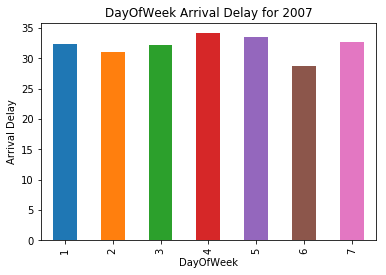

In [28]:
dow_arrdelay7_plot = dow_arrdelay2007.plot(kind='bar',x='DayOfWeek', y='mean_dow_arrdelay', legend=None, title="DayOfWeek Arrival Delay for 2007")
dow_arrdelay7_plot.set_xlabel("DayOfWeek")
dow_arrdelay7_plot.set_ylabel("Arrival Delay")

Text(0,0.5,'Departure Delay')

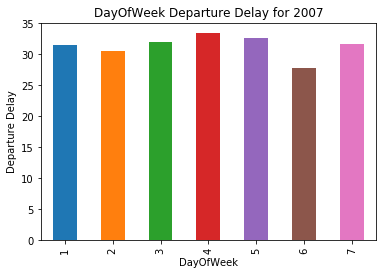

In [29]:
sea_depdelay7_plot = dow_depdelay2007.plot(kind='bar',x='DayOfWeek', y='mean_dow_depdelay', legend=None, title="DayOfWeek Departure Delay for 2007")
sea_depdelay7_plot.set_xlabel("DayOfWeek")
sea_depdelay7_plot.set_ylabel("Departure Delay")

In [30]:
#2008 arrival and departure delay on weekends

dow_arrdelay2008 = air2008.select(['DayOfWeek', 'ArrDelay']).\
    filter('ArrDelay > 0').\
    groupby('DayOfWeek').\
    agg(mean('ArrDelay').alias("mean_dow_arrdelay")).\
    orderBy("DayOfWeek").\
    toPandas()
    
dow_depdelay2008 = air2008.select(['DayOfWeek', 'DepDelay']).\
    filter('DepDelay > 0').\
    groupby('DayOfWeek').\
    agg(mean('DepDelay').alias("mean_dow_depdelay")).\
    orderBy("DayOfWeek").\
    toPandas()    


Text(0,0.5,'Arrival Delay')

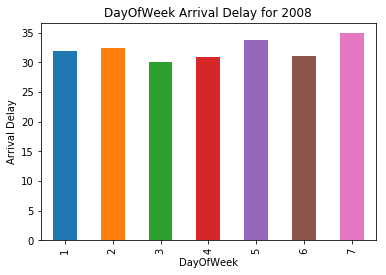

In [31]:
dow_arrdelay8_plot = dow_arrdelay2008.plot(kind='bar',x='DayOfWeek', y='mean_dow_arrdelay', legend=None, title="DayOfWeek Arrival Delay for 2008")
dow_arrdelay8_plot.set_xlabel("DayOfWeek")
dow_arrdelay8_plot.set_ylabel("Arrival Delay")

Text(0,0.5,'Departure Delay')

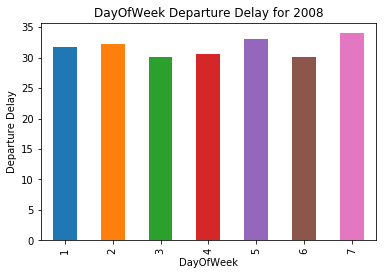

In [32]:
sea_depdelay8_plot = dow_depdelay2008.plot(kind='bar',x='DayOfWeek', y='mean_dow_depdelay', legend=None, title="DayOfWeek Departure Delay for 2008")
sea_depdelay8_plot.set_xlabel("DayOfWeek")
sea_depdelay8_plot.set_ylabel("Departure Delay")

Comment: For 2007, we see that the arrival and departure delay is worst on Thursdays and Fridays. For 2008, the arrival and departure delay is worst on Fridays and Sundays. Surprisingly, the least arrival and departure delay for 2007 and 2008 are Satursdays.

# 5. Are flights equally distributed throughout the day? Plot the distribution of DepTime, ArrTime (actual departure and arrival time)

In [33]:
# arrival time 2007
#we note that the ArrTime is in the format of hhmm, we create a col called arrtime to reclassify the ArrTime as hours (0,1,..23)
arrtime2007 = air2007.\
    withColumn("arrtime",\
               when(col("ArrTime") < 100, 0).\
               when(col("ArrTime") < 200, 1).\
               when(col("ArrTime") < 300, 2).\
               when(col("ArrTime") < 400, 3).\
               when(col("ArrTime") < 500, 4).\
               when(col("ArrTime") < 600, 5).\
               when(col("ArrTime") < 700, 6).\
               when(col("ArrTime") < 800, 7).\
               when(col("ArrTime") < 900, 8).\
               when(col("ArrTime") < 1000, 9).\
               when(col("ArrTime") < 1100, 10).\
               when(col("ArrTime") < 1200, 11).\
               when(col("ArrTime") < 1300, 12).\
               when(col("ArrTime") < 1400, 13).\
               when(col("ArrTime") < 1500, 14).\
               when(col("ArrTime") < 1600, 15).\
               when(col("ArrTime") < 1700, 16).\
               when(col("ArrTime") < 1800, 17).\
               when(col("ArrTime") < 1900, 18).\
               when(col("ArrTime") < 2000, 19).\
               when(col("ArrTime") < 2100, 20).\
               when(col("ArrTime") < 2200, 21).\
               when(col("ArrTime") < 2300, 22).\
               otherwise(23)).\
    groupby('arrtime').\
    agg(count('arrtime').alias('NumberOfFlights')).\
    orderBy("arrtime").\
    toPandas()


Text(0,0.5,'Number of Flights')

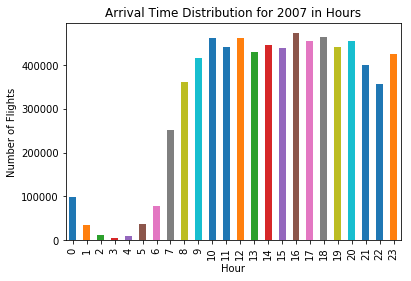

In [34]:
hour_arrtime7_plot = arrtime2007.plot(kind='bar',x='arrtime', y='NumberOfFlights', legend=None, title= "Arrival Time Distribution for 2007 in Hours")
hour_arrtime7_plot.set_xlabel("Hour")
hour_arrtime7_plot.set_ylabel("Number of Flights")

In [35]:
# departure time 2007
deptime2007 = air2007.\
    withColumn("deptime",\
               when(col("DepTime") < 100, 0).\
               when(col("DepTime") < 200, 1).\
               when(col("DepTime") < 300, 2).\
               when(col("DepTime") < 400, 3).\
               when(col("DepTime") < 500, 4).\
               when(col("DepTime") < 600, 5).\
               when(col("DepTime") < 700, 6).\
               when(col("DepTime") < 800, 7).\
               when(col("DepTime") < 900, 8).\
               when(col("DepTime") < 1000, 9).\
               when(col("DepTime") < 1100, 10).\
               when(col("DepTime") < 1200, 11).\
               when(col("DepTime") < 1300, 12).\
               when(col("DepTime") < 1400, 13).\
               when(col("DepTime") < 1500, 14).\
               when(col("DepTime") < 1600, 15).\
               when(col("DepTime") < 1700, 16).\
               when(col("DepTime") < 1800, 17).\
               when(col("DepTime") < 1900, 18).\
               when(col("DepTime") < 2000, 19).\
               when(col("DepTime") < 2100, 20).\
               when(col("DepTime") < 2200, 21).\
               when(col("DepTime") < 2300, 22).\
               otherwise(23)).\
    groupby('deptime').\
    agg(count('deptime').alias('NumberOfFlights')).\
    orderBy("deptime").\
    toPandas()


Text(0,0.5,'Number of Flights')

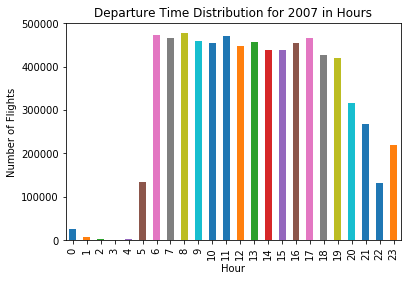

In [36]:
hour_deptime7_plot = deptime2007.plot(kind='bar',x='deptime', y='NumberOfFlights', legend=None, title= "Departure Time Distribution for 2007 in Hours")
hour_deptime7_plot.set_xlabel("Hour")
hour_deptime7_plot.set_ylabel("Number of Flights")

In [37]:
# arrival time 2008
arrtime2008 = air2008.\
    withColumn("arrtime",\
               when(col("ArrTime") < 100, 0).\
               when(col("ArrTime") < 200, 1).\
               when(col("ArrTime") < 300, 2).\
               when(col("ArrTime") < 400, 3).\
               when(col("ArrTime") < 500, 4).\
               when(col("ArrTime") < 600, 5).\
               when(col("ArrTime") < 700, 6).\
               when(col("ArrTime") < 800, 7).\
               when(col("ArrTime") < 900, 8).\
               when(col("ArrTime") < 1000, 9).\
               when(col("ArrTime") < 1100, 10).\
               when(col("ArrTime") < 1200, 11).\
               when(col("ArrTime") < 1300, 12).\
               when(col("ArrTime") < 1400, 13).\
               when(col("ArrTime") < 1500, 14).\
               when(col("ArrTime") < 1600, 15).\
               when(col("ArrTime") < 1700, 16).\
               when(col("ArrTime") < 1800, 17).\
               when(col("ArrTime") < 1900, 18).\
               when(col("ArrTime") < 2000, 19).\
               when(col("ArrTime") < 2100, 20).\
               when(col("ArrTime") < 2200, 21).\
               when(col("ArrTime") < 2300, 22).\
               otherwise(23)).\
    groupby('arrtime').\
    agg(count('arrtime').alias('NumberOfFlights')).\
    orderBy("arrtime").\
    toPandas()


Text(0,0.5,'Number of Flights')

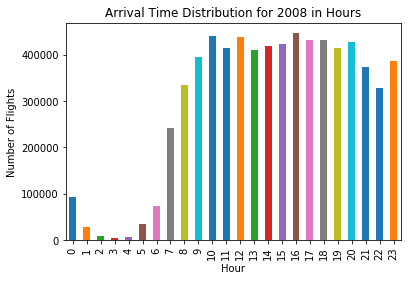

In [38]:
hour_arrtime8_plot = arrtime2008.plot(kind='bar',x='arrtime', y='NumberOfFlights', legend=None, title= "Arrival Time Distribution for 2008 in Hours")
hour_arrtime8_plot.set_xlabel("Hour")
hour_arrtime8_plot.set_ylabel("Number of Flights")

In [39]:
# departure time 2008
deptime2008 = air2008.\
    withColumn("deptime",\
               when(col("DepTime") < 100, 0).\
               when(col("DepTime") < 200, 1).\
               when(col("DepTime") < 300, 2).\
               when(col("DepTime") < 400, 3).\
               when(col("DepTime") < 500, 4).\
               when(col("DepTime") < 600, 5).\
               when(col("DepTime") < 700, 6).\
               when(col("DepTime") < 800, 7).\
               when(col("DepTime") < 900, 8).\
               when(col("DepTime") < 1000, 9).\
               when(col("DepTime") < 1100, 10).\
               when(col("DepTime") < 1200, 11).\
               when(col("DepTime") < 1300, 12).\
               when(col("DepTime") < 1400, 13).\
               when(col("DepTime") < 1500, 14).\
               when(col("DepTime") < 1600, 15).\
               when(col("DepTime") < 1700, 16).\
               when(col("DepTime") < 1800, 17).\
               when(col("DepTime") < 1900, 18).\
               when(col("DepTime") < 2000, 19).\
               when(col("DepTime") < 2100, 20).\
               when(col("DepTime") < 2200, 21).\
               when(col("DepTime") < 2300, 22).\
               otherwise(23)).\
    groupby('deptime').\
    agg(count('deptime').alias('NumberOfFlights')).\
    orderBy("deptime").\
    toPandas()

Text(0,0.5,'Number of Flights')

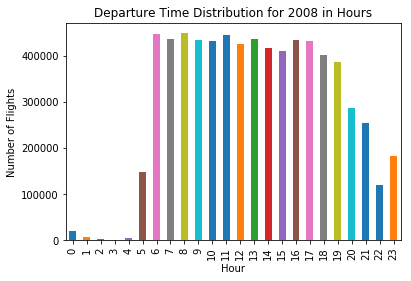

In [40]:
hour_deptime8_plot = deptime2008.plot(kind='bar',x='deptime', y='NumberOfFlights', legend=None, title= "Departure Time Distribution for 2008 in Hours")
hour_deptime8_plot.set_xlabel("Hour")
hour_deptime8_plot.set_ylabel("Number of Flights")

Comment: the overall arrival and departure time distribution look similar for 2007 and 2008, where the arrival and departure flight between 0-5 is significantly lower as compared to the rest of the hours. The rest of the hours are pretty equally distributed except for when it reaches 20-23 where the number of flights decrease. 

# 6. Do you see the worst delays at any certain times of the day? Contrast DepTime, ArrTime with CRSDepTime, CRSArrTime (scheduled arrival and departure time; CRS is the Computer Reservation System)


In [41]:
# arrival delay 2007 in hours
#we note that the difference in DepTime and SRSDepTime is DepDelay and the difference in ArrTime and CRSArrTime is ArrDelay
#therefore we will first filter on delayed flights (ArrDelay >0), then we will reclassify the hours to two digits

hour_arrdelay2007 = air2007.select(['ArrDelay', 'ArrTime']).\
    filter('ArrDelay > 0').\
    withColumn("arrtime",\
               when(col("ArrTime") < 100, 0).\
               when(col("ArrTime") < 200, 1).\
               when(col("ArrTime") < 300, 2).\
               when(col("ArrTime") < 400, 3).\
               when(col("ArrTime") < 500, 4).\
               when(col("ArrTime") < 600, 5).\
               when(col("ArrTime") < 700, 6).\
               when(col("ArrTime") < 800, 7).\
               when(col("ArrTime") < 900, 8).\
               when(col("ArrTime") < 1000, 9).\
               when(col("ArrTime") < 1100, 10).\
               when(col("ArrTime") < 1200, 11).\
               when(col("ArrTime") < 1300, 12).\
               when(col("ArrTime") < 1400, 13).\
               when(col("ArrTime") < 1500, 14).\
               when(col("ArrTime") < 1600, 15).\
               when(col("ArrTime") < 1700, 16).\
               when(col("ArrTime") < 1800, 17).\
               when(col("ArrTime") < 1900, 18).\
               when(col("ArrTime") < 2000, 19).\
               when(col("ArrTime") < 2100, 20).\
               when(col("ArrTime") < 2200, 21).\
               when(col("ArrTime") < 2300, 22).\
               otherwise(23)).\
    groupby('arrtime').\
    agg(mean('ArrDelay').alias('mean_arrdelay')).\
    orderBy("arrtime").\
    toPandas()



Text(0,0.5,'Arrival Delay')

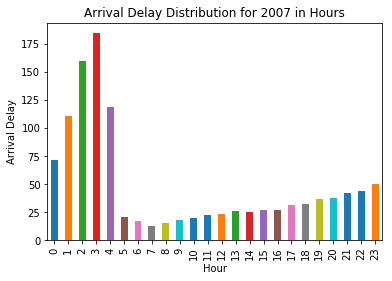

In [43]:
hour_arrdelay7_plot = hour_arrdelay2007.plot(kind='bar',x='arrtime', y='mean_arrdelay', legend=None, title= "Arrival Delay Distribution for 2007 in Hours")
hour_arrdelay7_plot.set_xlabel("Hour")
hour_arrdelay7_plot.set_ylabel("Arrival Delay")

In [46]:
# departure delay 2007 in hours

hour_depdelay2007 = air2007.select(['DepDelay', 'DepTime']).\
    filter('DepDelay > 0').\
    withColumn("deptime",\
               when(col("DepTime") < 100, 0).\
               when(col("DepTime") < 200, 1).\
               when(col("DepTime") < 300, 2).\
               when(col("DepTime") < 400, 3).\
               when(col("DepTime") < 500, 4).\
               when(col("DepTime") < 600, 5).\
               when(col("DepTime") < 700, 6).\
               when(col("DepTime") < 800, 7).\
               when(col("DepTime") < 900, 8).\
               when(col("DepTime") < 1000, 9).\
               when(col("DepTime") < 1100, 10).\
               when(col("DepTime") < 1200, 11).\
               when(col("DepTime") < 1300, 12).\
               when(col("DepTime") < 1400, 13).\
               when(col("DepTime") < 1500, 14).\
               when(col("DepTime") < 1600, 15).\
               when(col("DepTime") < 1700, 16).\
               when(col("DepTime") < 1800, 17).\
               when(col("DepTime") < 1900, 18).\
               when(col("DepTime") < 2000, 19).\
               when(col("DepTime") < 2100, 20).\
               when(col("DepTime") < 2200, 21).\
               when(col("DepTime") < 2300, 22).\
               otherwise(23)).\
    groupby('deptime').\
    agg(mean('DepDelay').alias('mean_depdelay')).\
    orderBy("deptime").\
    toPandas()


Text(0,0.5,'Departure Delay')

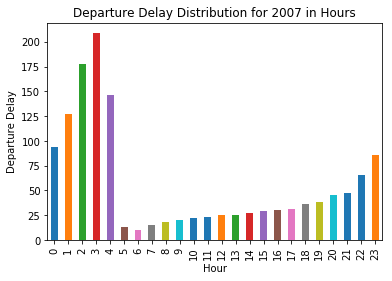

In [47]:
hour_depdelay7_plot = hour_depdelay2007.plot(kind='bar',x='deptime', y='mean_depdelay', legend=None, title= "Departure Delay Distribution for 2007 in Hours")
hour_depdelay7_plot.set_xlabel("Hour")
hour_depdelay7_plot.set_ylabel("Departure Delay")

In [48]:
# arrival delay 2008 in hours

hour_arrdelay2008 = air2008.select(['ArrDelay', 'ArrTime']).\
    filter('ArrDelay > 0').\
    withColumn("arrtime",\
               when(col("ArrTime") < 100, 0).\
               when(col("ArrTime") < 200, 1).\
               when(col("ArrTime") < 300, 2).\
               when(col("ArrTime") < 400, 3).\
               when(col("ArrTime") < 500, 4).\
               when(col("ArrTime") < 600, 5).\
               when(col("ArrTime") < 700, 6).\
               when(col("ArrTime") < 800, 7).\
               when(col("ArrTime") < 900, 8).\
               when(col("ArrTime") < 1000, 9).\
               when(col("ArrTime") < 1100, 10).\
               when(col("ArrTime") < 1200, 11).\
               when(col("ArrTime") < 1300, 12).\
               when(col("ArrTime") < 1400, 13).\
               when(col("ArrTime") < 1500, 14).\
               when(col("ArrTime") < 1600, 15).\
               when(col("ArrTime") < 1700, 16).\
               when(col("ArrTime") < 1800, 17).\
               when(col("ArrTime") < 1900, 18).\
               when(col("ArrTime") < 2000, 19).\
               when(col("ArrTime") < 2100, 20).\
               when(col("ArrTime") < 2200, 21).\
               when(col("ArrTime") < 2300, 22).\
               otherwise(23)).\
    groupby('arrtime').\
    agg(mean('ArrDelay').alias('mean_arrdelay')).\
    orderBy("arrtime").\
    toPandas()



Text(0,0.5,'Arrival Delay')

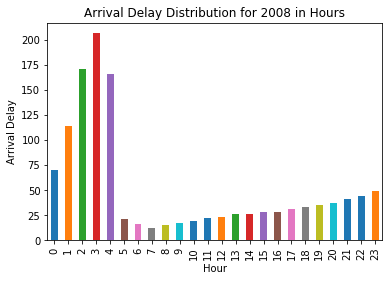

In [49]:
hour_arrdelay8_plot = hour_arrdelay2008.plot(kind='bar',x='arrtime', y='mean_arrdelay', legend=None, title= "Arrival Delay Distribution for 2008 in Hours")
hour_arrdelay8_plot.set_xlabel("Hour")
hour_arrdelay8_plot.set_ylabel("Arrival Delay")

In [50]:
# departure delay 2008 in hours

hour_depdelay2008 = air2008.select(['DepDelay', 'DepTime']).\
    filter('DepDelay > 0').\
    withColumn("deptime",\
               when(col("DepTime") < 100, 0).\
               when(col("DepTime") < 200, 1).\
               when(col("DepTime") < 300, 2).\
               when(col("DepTime") < 400, 3).\
               when(col("DepTime") < 500, 4).\
               when(col("DepTime") < 600, 5).\
               when(col("DepTime") < 700, 6).\
               when(col("DepTime") < 800, 7).\
               when(col("DepTime") < 900, 8).\
               when(col("DepTime") < 1000, 9).\
               when(col("DepTime") < 1100, 10).\
               when(col("DepTime") < 1200, 11).\
               when(col("DepTime") < 1300, 12).\
               when(col("DepTime") < 1400, 13).\
               when(col("DepTime") < 1500, 14).\
               when(col("DepTime") < 1600, 15).\
               when(col("DepTime") < 1700, 16).\
               when(col("DepTime") < 1800, 17).\
               when(col("DepTime") < 1900, 18).\
               when(col("DepTime") < 2000, 19).\
               when(col("DepTime") < 2100, 20).\
               when(col("DepTime") < 2200, 21).\
               when(col("DepTime") < 2300, 22).\
               otherwise(23)).\
    groupby('deptime').\
    agg(mean('DepDelay').alias('mean_depdelay')).\
    orderBy("deptime").\
    toPandas()

Text(0,0.5,'Arrival Delay')

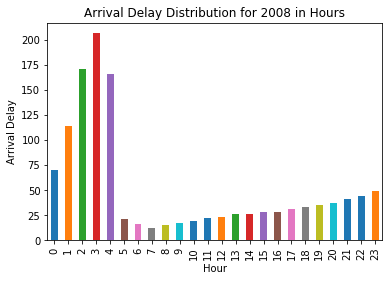

In [51]:
hour_arrdelay8_plot = hour_arrdelay2008.plot(kind='bar',x='arrtime', y='mean_arrdelay', legend=None, title= "Arrival Delay Distribution for 2008 in Hours")
hour_arrdelay8_plot.set_xlabel("Hour")
hour_arrdelay8_plot.set_ylabel("Arrival Delay")

Comment: All the graphs have a very similar distribution where the average delay during midnight (0-4am) is siginificantly worse than rest of the hours. Then the average delay started to slowly increase starting from 7am to later at night. One of the reasons why the delays are so much significant in midnight might because as the delays accumulate throughout the day, flights arrive or needed to be depart at midnight is facing the most severe delay. 